In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model_bias = LogisticRegression(C=0.01, max_iter=1000)
model_bias.fit(X_train, y_train)

model_variance = DecisionTreeClassifier(max_depth=None)
model_variance.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [3]:
for name, model in [("Logistic Regression (Bias)", model_bias), ("Decision Tree (Variance)", model_variance)]:
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} -> Train: {train_acc:.3f}, Test: {test_acc:.3f}")


Logistic Regression (Bias) -> Train: 0.945, Test: 0.965
Decision Tree (Variance) -> Train: 1.000, Test: 0.930


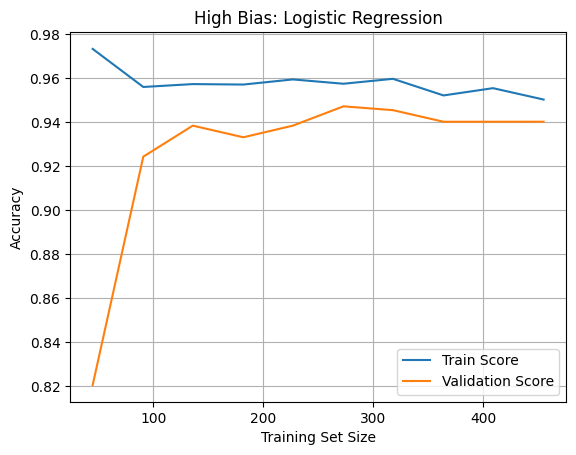

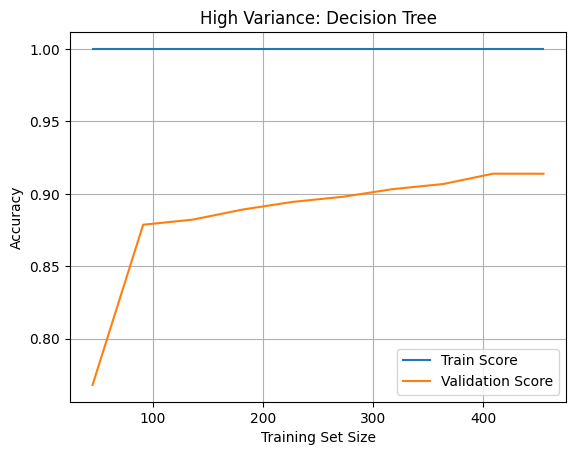

In [ ]:
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Train Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(model_bias, "High Bias: Logistic Regression")
plot_learning_curve(model_variance, "High Variance: Decision Tree")
